In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! pip install --user -U nltk

Requirement already up-to-date: nltk in /Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages (3.5)


In [4]:
! pip install textblob

     |████████████████████████████████| 636 kB 3.0 MB/s eta 0:00:01


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline

In [6]:
url = 'https://raw.githubusercontent.com/kevintr/DS_LAB_PSYCOLOGY_2021/main/dataset/vaccination_all_tweets.csv'
tweets_df = pd.read_csv(url)

In [11]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [10]:
tweets_df.shape

(33717, 16)

In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33717 entries, 0 to 33716
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                33717 non-null  int64 
 1   user_name         33717 non-null  object
 2   user_location     25937 non-null  object
 3   user_description  31402 non-null  object
 4   user_created      33717 non-null  object
 5   user_followers    33717 non-null  int64 
 6   user_friends      33717 non-null  int64 
 7   user_favourites   33717 non-null  int64 
 8   user_verified     33717 non-null  bool  
 9   date              33717 non-null  object
 10  text              33717 non-null  object
 11  hashtags          26543 non-null  object
 12  source            33689 non-null  object
 13  retweets          33717 non-null  int64 
 14  favorites         33717 non-null  int64 
 15  is_retweet        33717 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.7+ MB


In [13]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,7780,2315,0,0,0,0,0,0,0,7174,28,0,0,0
Percent,0,0,23.0744,6.86597,0,0,0,0,0,0,0,21.2771,0.0830442,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,33717,33717,25937,31402,33717,33717,33717,33717,33717,33717,33717,26543,33689,33717,33717,33717
Most frequent item,1364449897190027270,Workout Solutions,India,George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,0,0,0,False,2021-03-02 23:02:10,@POTUS What about #Covaxin from #Ocugen ?! It ...,['Covaxin'],Twitter Web App,0,0,False
Frequence,1,402,988,402,402,285,299,484,29729,4,5,1415,10930,21213,13775,33717
Percent from total,0.003,1.192,3.809,1.28,1.192,0.845,0.887,1.435,88.172,0.012,0.015,5.331,32.444,62.915,40.855,100


In [18]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/mat

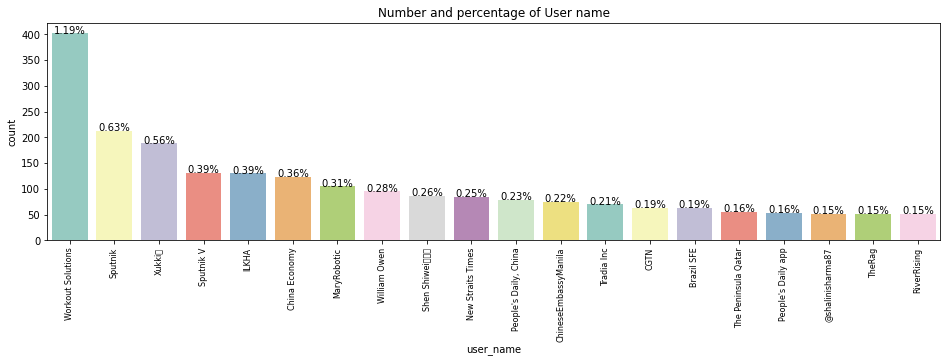

In [19]:
plot_count("user_name", "User name", tweets_df,4)

/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


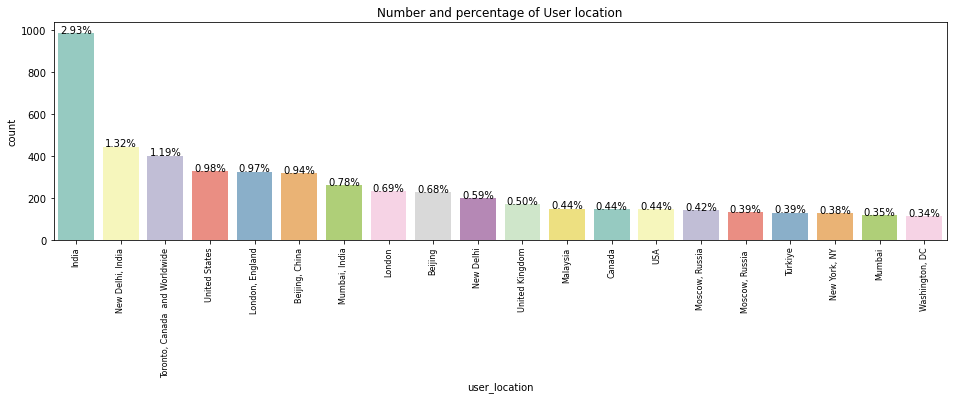

In [20]:
plot_count("user_location", "User location", tweets_df,4)

In [21]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [22]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [23]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

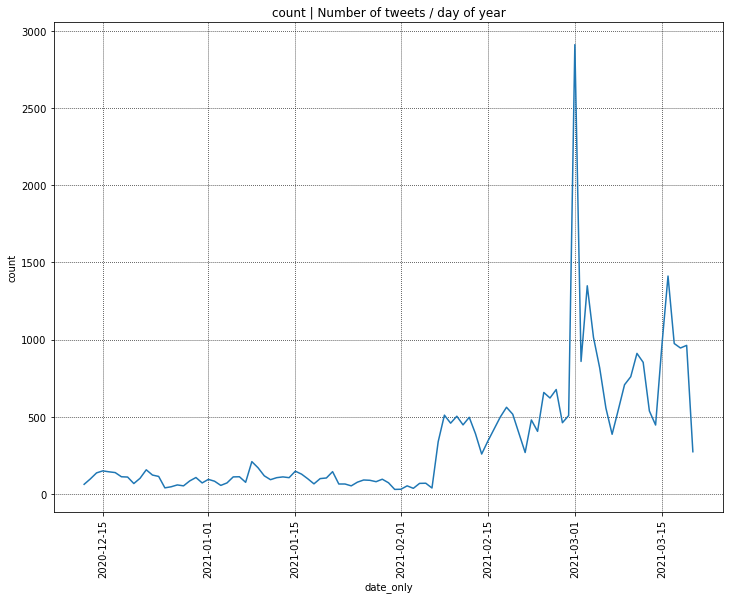

In [24]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

/Volumes/HDD_Ale/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


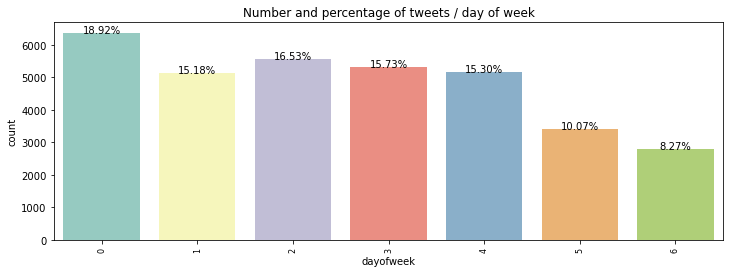

In [25]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

SENTIMENT ANALYSIS

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alessandropontini/nltk_data...


True

In [28]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [29]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

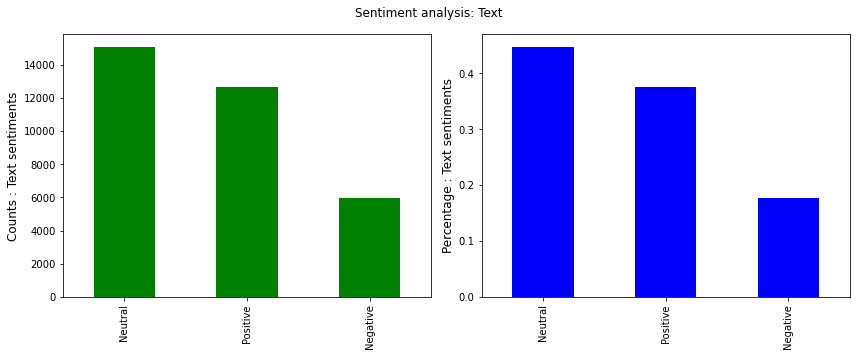

In [30]:
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'sentiment', 'Text')